In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preparation 

In [2]:
#Read data using pandas - Import the IPL dataset from kaggle
ball_faced=pd.read_csv('each_ball_records.csv')
ball_faced.head()

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score
0,1,1,1,0.1,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0
1,1,2,1,0.2,1lb,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, 1 leg bye,",1
2,1,3,1,0.3,0,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, no run,",0
3,1,4,1,0.4,1,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, 1 run,",1
4,1,5,1,0.5,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0


In [3]:
#Take the required features
df=ball_faced[['batter','score','outcome']]

In [4]:
df.head()

,batter,score,outcome
0,Devon Conway,0,0
1,Devon Conway,1,1lb
2,Ruturaj Gaikwad,0,0
3,Ruturaj Gaikwad,1,1
4,Devon Conway,0,0


## Feature Engg

In [5]:

#get each player details and geneation of two new features (strike_rates and averages)
player_details = []
for name in df['batter'].unique():
    ball_faced = df[df['batter'] == name]['score'].count()
    if ball_faced >=100:  #select players who has played minimum 100 balls
        scored_runs = df[df['batter'] == name]['score'].sum()        
        times_out = df[(df['batter'] == name ) & (df['outcome'] == 'w' )]['outcome'].count() 
    
        strike_rate = round((scored_runs/ball_faced)*100,2)
        average = round((scored_runs/times_out),2)
        player_array = [name, strike_rate, average]
        player_details.append(player_array)

df_players=pd.DataFrame(player_details,columns=['Name','Strike_rate','Average']) 


In [6]:
df_players.head(200)

,Name,Strike_rate,Average
0,Devon Conway,142.20,48.86
1,Ruturaj Gaikwad,149.02,46.77
2,Ambati Rayudu,139.13,16.00
3,Shivam Dube,158.12,39.82
4,Ravindra Jadeja,145.65,25.12
...,...,...,...
59,Atharva Taide,140.48,29.50
60,Liam Livings,169.71,33.00
61,Jason Roy,150.00,36.00
62,Philip Salt,166.67,28.12


## EDA

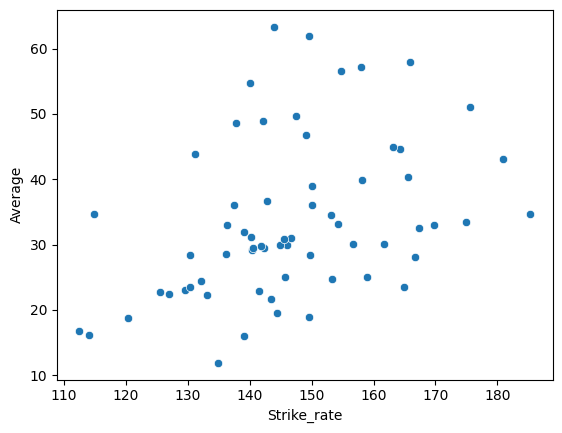

In [7]:
#visulization strike_rates vs  averages
sns.scatterplot(data=df_players,x='Strike_rate',y='Average');
#Generally players are more in number having strike_rate b/w 125 to 160 - and having average b/w 20 to 40)

## K-Means Clustering 

In [8]:
#lets starts kmeans
from sklearn.cluster import KMeans

In [9]:
#find the optimal number of cluster using elbow


In [10]:
X=df_players[['Strike_rate','Average']].values

In [11]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         64 non-null     object 
 1   Strike_rate  64 non-null     float64
 2   Average      64 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [12]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

In [13]:
wcss

[24548.280892187504,
 12669.169437698414,
 8730.916803529411,
 5812.132083967885,
 4757.495732359308,
 4152.138719141415,
 3510.537036926408,
 2986.932843012478,
 2579.7581082142865,
 2253.421282857142]

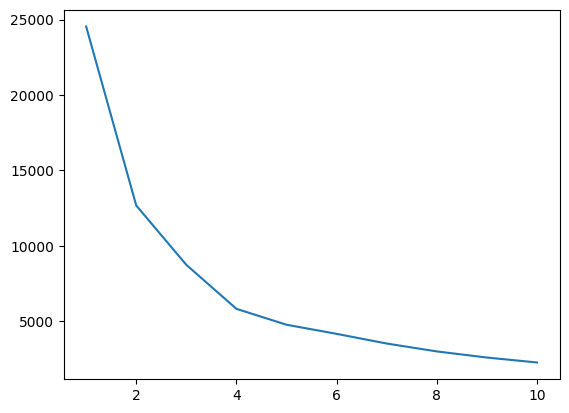

In [14]:
#Result of elbow curve
plt.plot(range(1,11),wcss)

In [15]:
#Take number of cluster = 4 by seeing from above picture

In [16]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y=kmeans.fit_predict(X)

C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rupeshv\Anaconda3\envs\rup_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
y

array([3, 3, 2, 0, 1, 2, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 1, 1, 1, 3, 1, 2,
       1, 2, 1, 0, 1, 3, 1, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       0, 0, 0, 1, 0, 3, 3, 2, 0, 1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1])

In [18]:
output=pd.DataFrame(np.column_stack([df_players['Name'],X,y]),columns=['Name','Strike_rate','Average','Cluster'])
output

,Name,Strike_rate,Average,Cluster
0,Devon Conway,142.2,48.86,3
1,Ruturaj Gaikwad,149.02,46.77,3
2,Ambati Rayudu,139.13,16.0,2
3,Shivam Dube,158.12,39.82,0
4,Ravindra Jadeja,145.65,25.12,1
...,...,...,...,...
59,Atharva Taide,140.48,29.5,1
60,Liam Livings,169.71,33.0,0
61,Jason Roy,150.0,36.0,1
62,Philip Salt,166.67,28.12,0


## Cluster analysis and interpretation 

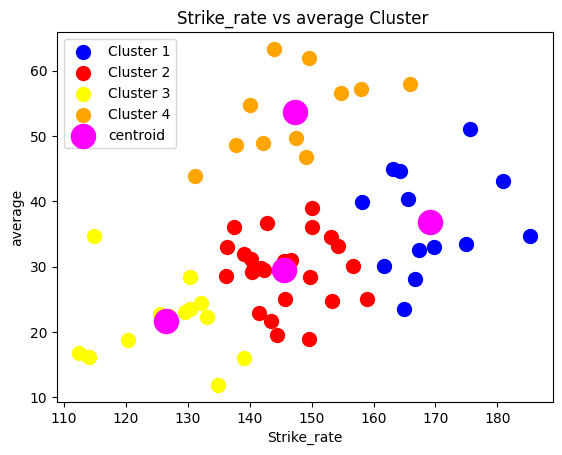

In [19]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'red', label = 'Cluster 2') #for second cluster  

plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3') #for third cluster  

plt.scatter(X[y == 3, 0], X[y == 3, 1], s = 100, c = 'orange', label = 'Cluster 4') #for fourth cluster  

#plt.scatter(X[y == 4, 0], X[y == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5') #for fifth cluster  

# plt.scatter(X[y == 5, 0], X[y == 5, 1], s = 100, c = 'black', label = 'Cluster 6') #for six cluster  


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='magenta',label='centroid'
           )

plt.title("Strike_rate vs average Cluster ")
plt.xlabel("Strike_rate")
plt.ylabel("average")
plt.legend()
plt.show()

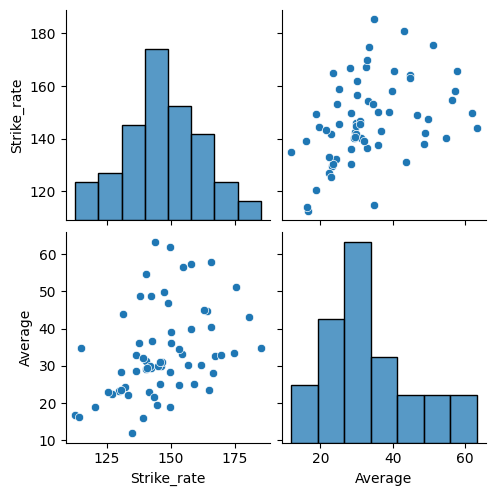

In [20]:
sns.pairplot(data=df_players)

In [21]:
df_players.describe()

,Strike_rate,Average
count,64.000000,64.000000
mean,146.762656,33.546563
std,15.663029,12.013524
min,112.500000,11.920000
25%,137.655000,24.642500
50%,145.215000,30.935000
75%,157.015000,39.960000
max,185.330000,63.330000


<AxesSubplot: >

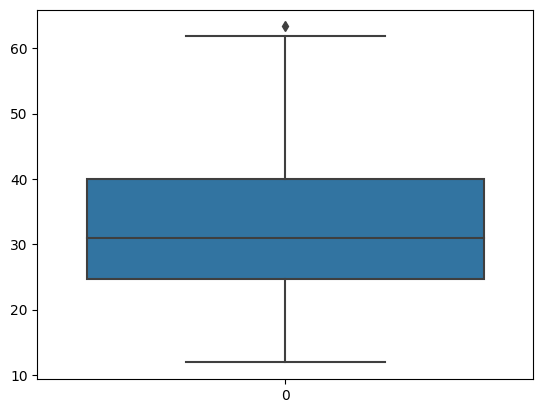

In [22]:

sns.boxplot(df_players['Average'])

<AxesSubplot: >

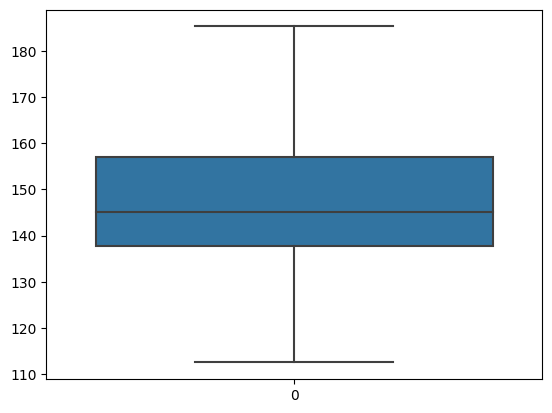

In [23]:
sns.boxplot(df_players['Strike_rate'])

## Interpret characterics of each cluster

In [24]:
#number of categories created
def cluster_mapping(number):
    if number == 0:
        return "Aggressive Hitters "
    if number == 1:
        return "Consistent Performers"
    if number == 2:
        return "Middle order attacking"
    if number == 3:
        return "Low order Batsman"


In [25]:
output['Label'] = output['Cluster'].apply(cluster_mapping)

In [26]:
output['Label']

0          Low order Batsman
1          Low order Batsman
2     Middle order attacking
3        Aggressive Hitters 
4      Consistent Performers
               ...          
59     Consistent Performers
60       Aggressive Hitters 
61     Consistent Performers
62       Aggressive Hitters 
63     Consistent Performers
Name: Label, Length: 64, dtype: object

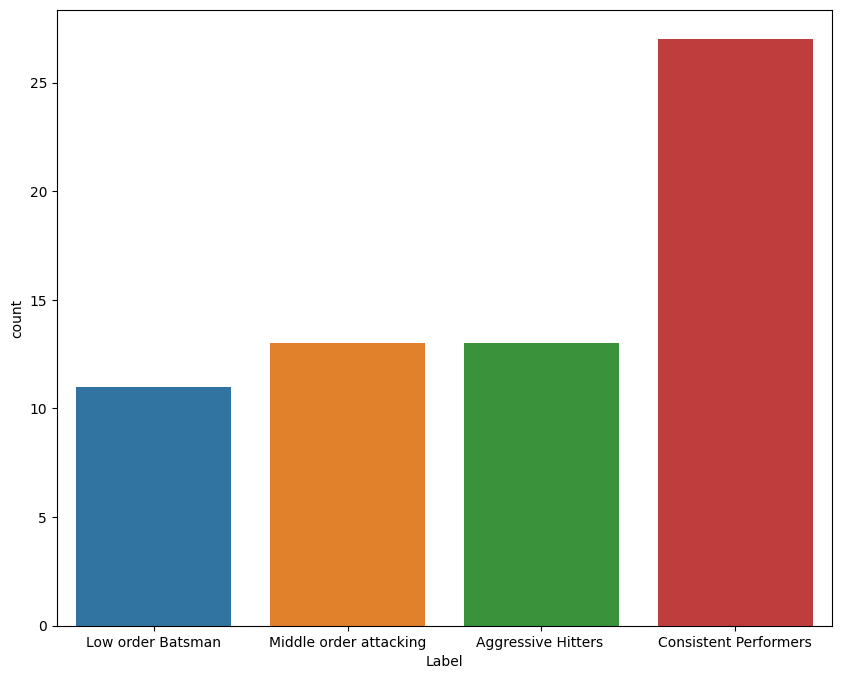

In [27]:
#visulization of label count in data
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.countplot(data=output,x='Label',ax=ax)



## Result: Consistent performers are more in number